# Regularización

Hasta ahora, cuando ajustamos modelos lineales, seleccionamos el modelo que minimizaba el error cuadrático.
Para un modelo de la forma
$$y_i = f(x_i) + e_i$$
minimizamos la suma
$$\sum_{i}{\left(\hat{y}_i - y_i \right)^2}$$
Este es un ejemplo de _funcion de costo_: una función que mide el "costo" de los errores de las predicciones de un modelo. Para aplicar la técnica de regularización, modificamos la función de costo, agregando un término que penaliza los modelos por su complejidad. Por ejemplo, podríamos tener una nueva función de costo de la forma:
$$\sum_{i}{\left(\hat{y}_i - y_i \right)^2 + \alpha \theta_i}$$
donde el vector $\theta$ corresponde a los parámetros de nuestro modeloy $\alpha$ es un parámetro que controla cuán fuerte es la penalización. Un mayor valor de $\alpha$ significa una mayor penalización, ya que aumenta el costo, que es lo que buscamos minimizar.

El ejemplo clásico es ajustar un polinomio a un set de datos pequeño. Veamos cómo funciona con un datset de ejemplo.

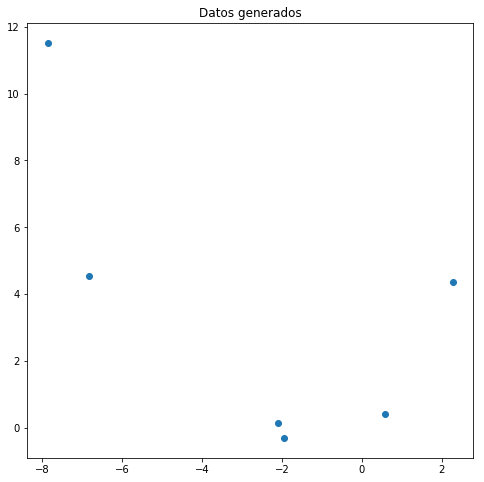

In [1]:
%matplotlib inline
import random
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
plt.rcParams['figure.figsize'] = 8, 8

random.seed(5)

# Generamos un dataset de ejemplo
def generate_data():
    xs = np.arange(-3, 3, 1)
    data = [(2 * x - 3 * random.random(), (x - 3*random.random()) * (x + random.random())) for x in xs]
    data.sort()
    xs = [x for (x, y) in data]
    ys = [y for (x, y) in data]
    return xs, ys

xs, ys = generate_data()
plt.scatter(xs, ys)
plt.title("Datos generados")
plt.show()

Intentemos ahora ajustar un modelo. Si intentamos ajustar un modelo de grado 4, obtendremos lo que llamamos un modelo sobreajustado.

In [3]:
X = np.vander(xs, 4)
X

array([[ -4.87202833e+02,   6.19165197e+01,  -7.86870508e+00,
          1.00000000e+00],
       [ -3.18241391e+02,   4.66127196e+01,  -6.82735085e+00,
          1.00000000e+00],
       [ -9.09027745e+00,   4.35563447e+00,  -2.08701568e+00,
          1.00000000e+00],
       [ -7.37983698e+00,   3.79051174e+00,  -1.94692366e+00,
          1.00000000e+00],
       [  2.08309408e-01,   3.51403371e-01,   5.92792857e-01,
          1.00000000e+00],
       [  1.18239359e+01,   5.19008787e+00,   2.27817644e+00,
          1.00000000e+00]])

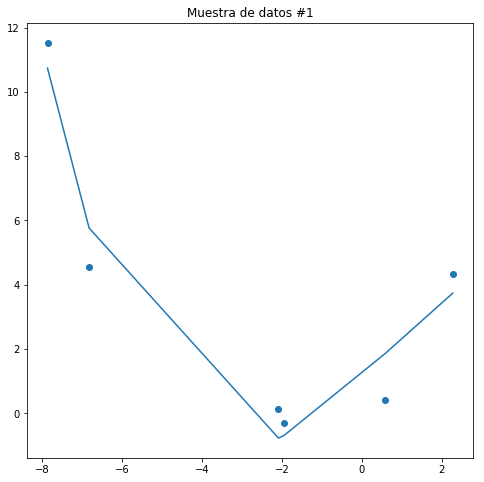

r^2: 0.945031349805


In [4]:
lm = linear_model.LinearRegression()

# Esta funcion de numpy genera la matriz polinomica a partir de una serie de valores
X = np.vander(xs, 4)
y = ys

model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(xs, ys)
plt.title("Muestra de datos #1")
plt.plot(xs, predictions)
plt.show()
print ("r^2:", model.score(X, y))

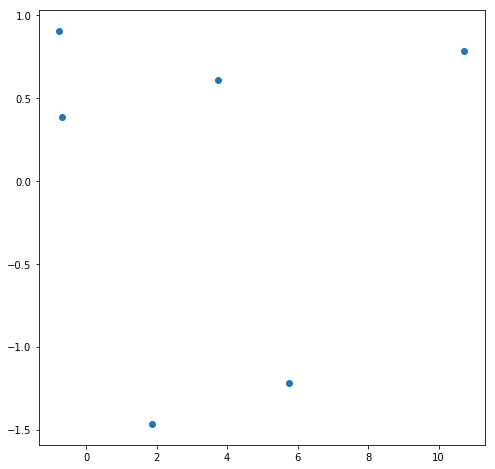

In [7]:
e = y - predictions
plt.scatter(predictions, e)

Si aplicamos este mismo modelo a una nueva muestra de datos generados por la misma funcion, veremos que no ajusta muy bien. Mejor dicho, vemos que ajusta notablemente peor.

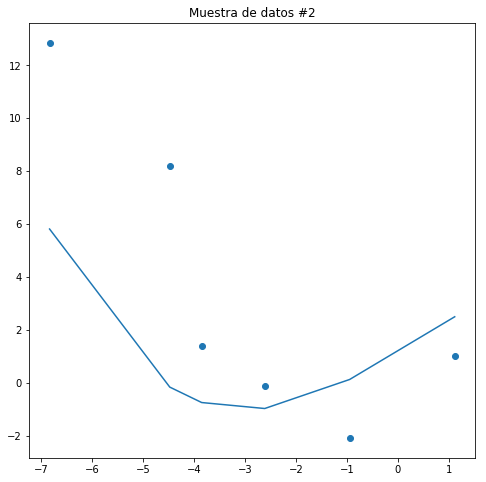

r^2: 0.200208218209


In [8]:
xs2, ys2 = generate_data()
X = np.vander(xs2, 4)
predictions = lm.predict(X)

plt.scatter(xs2, ys2)
plt.title("Muestra de datos #2")
plt.plot(xs2, predictions)
plt.show()
print ("r^2:", model.score(X, ys2))

# Regresión regularizada o Ridge Regression
Usemos scikit-learn para ajustar una regresión con regularización, como la que describimos en el inicio del notebook. Esta forma de regularización se llama _regresión contraida_ o _ridge regression_ en inglés.

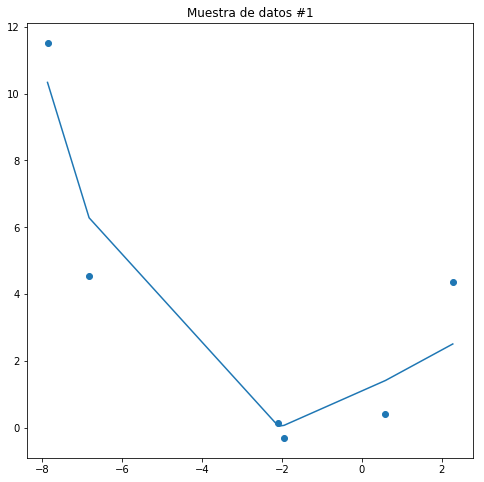

r^2: 0.911649018598


In [9]:
rlm = linear_model.Ridge(alpha=10)

# Ajustamos nuevamente, esta vez con regularizacion
X = np.vander(xs, 4)

y = ys

ridge_model = rlm.fit(X, y)
predictions = ridge_model.predict(X)

plt.scatter(xs, ys)
plt.title("Muestra de datos #1")
plt.plot(xs, predictions)
plt.show()
print ("r^2:", ridge_model.score(X, ys))

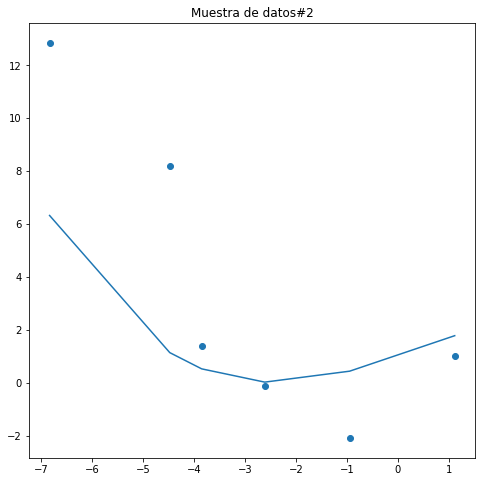

r^2: 0.392439059409


In [10]:
X = np.vander(xs2, 4)
predictions = ridge_model.predict(X)

plt.scatter(xs2, ys2)
plt.title("Muestra de datos#2")
plt.plot(xs2, predictions)
plt.show()
print ("r^2:", ridge_model.score(X, ys2))

Deberían observar que el ajuste de la _ridge regression_ empeoró un poco (es decir, no fue tan bueno) en muestra #1. En cambio, la mejora fue notablemente grande en la muestra #2. Esto es porque la regularización busca prevenir el sobreajuste (overfitting).

Si quieren ver otro ejemplo de ridge regularization pueden leer [este ejemplo](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge_variance.html) de la documentacion oficial de scikit-learn.

# Práctica guiada

Habrán notado que en el ejemplo seteamos el _hiperparámetro_ $\alpha$ en 10. Esta fue una decisión arbitraria, y existen maneras de determinar este valor empíricamente.

En general, debemos decidir la forma de elegir el parámetro $\alpha$ y existen formas automáticas de hacerlo. Una forma de hacerlo es con _validacion-cruzada_ o _cross-validation_ en inglés. Scikit-learn tiene funcionalidad para ayudarnos a aplicarla. Para esta práctica guiada, exploremos el ridge model que viene con funcionalidad para hacer [cross-validation](https://en.wikipedia.org/wiki/Cross-validation_%28statistics%29). 

Típicamente, el cross-validation funciona separando nuestro dataset entre datos para ajustar el modelo (training set) y datos para evaluar el modelo (testing set).

En este caso, el modelo que generamos con `RidgeCV` de scikit-learn, automáticamente prueba diferentes valores de $\alpha$. Ejecutá el siguiente código más de una vez. Deberías ver que elije diferentes valores de $\alpha$, ya que hace diferentes separaciones de los datos cada vez.

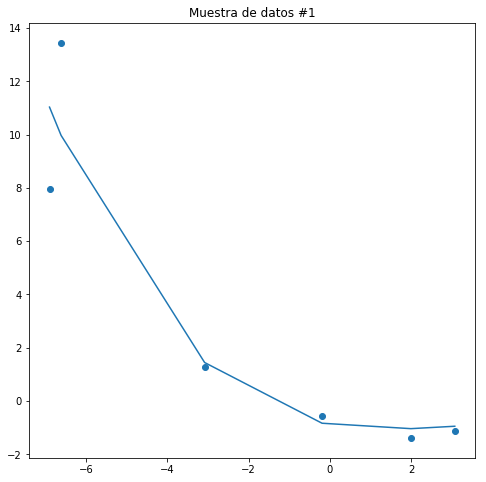

r^2: 0.882377474254
alpha: 10.0


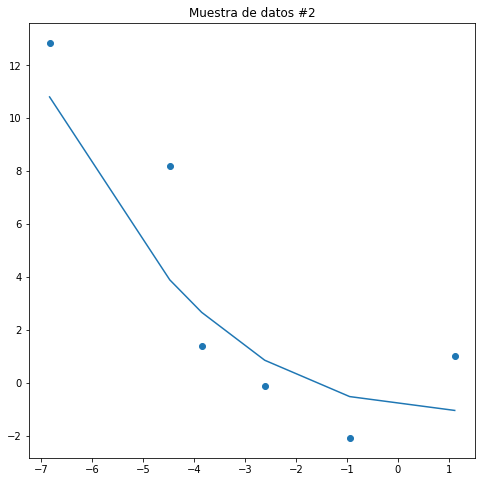

r^2: 0.805828426788


In [14]:
rlmcv = linear_model.RidgeCV()
xs, ys = generate_data()

# Ajustamos nuevamente nuestro modelo, esta vez con RidgeCV
X = np.vander(xs, 4)
y = ys
ridge_cv_model = rlmcv.fit(X, y)
predictions = rlmcv.predict(X)

plt.scatter(xs, ys)
plt.title("Muestra de datos #1")
plt.plot(xs, predictions)
plt.show()
print ("r^2:", ridge_cv_model.score(X, ys))
print ("alpha:", ridge_cv_model.alpha_)

X = np.vander(xs2, 4)
predictions = ridge_cv_model.predict(X)

plt.scatter(xs2, ys2)
plt.title("Muestra de datos #2")
plt.plot(xs2, predictions)
plt.show()
print ("r^2:", ridge_cv_model.score(X, ys2))

In [11]:
lm.coef_

array([-0.03178629,  0.05382933,  1.17468542,  0.        ])

In [12]:
ridge_model.coef_

array([-0.0235715 ,  0.05012947,  0.66747404,  0.        ])

In [15]:
ridge_cv_model.coef_

array([-0.01349244,  0.11979945, -0.25939156,  0.        ])